# 数据处理

In [2]:
import pandas as pd
import numpy as np
import time
import sqlite3


In [3]:
data_home = './SampleCode/'

In [4]:
triplet_dataset = pd.read_csv(filepath_or_buffer = data_home +'train_triplets.txt', 
                              sep='\t', header=None, 
                              names=['user','song','play_count'])

In [5]:
#四千多万行，数据太大可以考虑只选择部分
triplet_dataset.shape

(48373586, 3)

In [6]:
#int64或者float64可以考虑转32，这样节约内存
triplet_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48373586 entries, 0 to 48373585
Data columns (total 3 columns):
user          object
song          object
play_count    int64
dtypes: int64(1), object(2)
memory usage: 1.1+ GB


In [7]:
#用户id和歌曲名都是加密过的，用户id无所谓，歌曲名后面我们想办法转明文
triplet_dataset.head()

,user,song,play_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1


## 对每一个用户，分别统计他的播放总量

In [8]:
out_dict = {}
with open(data_home + 'train_triplets.txt') as f:
    for line_number, line in enumerate(f):
        user = line.split('\t')[0]
        play_count = int(line.split('\t')[2])
        #如果用户以前就有过播放行为，累加
        if user in out_dict:
            play_count += out_dict[user]
            out_dict.update({user:play_count})
        #如果用户第一次统计播放行为，赋值
        out_dict.update({user:play_count})
output_list = [{'user':k,'play_count':v} for k,v in out_dict.items()]

In [9]:
play_count_df = pd.DataFrame(output_list)
play_count_df

,play_count,user
0,142,b80344d063b5ccb3212f76538f3d9e43d87dca9e
1,38,85c1f87fea955d09b4bec2e36aee110927aedf9a
2,14,bd4c6e843f00bd476847fb75c47b4fb430a06856
3,78,8937134734f869debcab8f23d77465b4caaa85df
4,94,969cc6fb74e076a68e36a04409cb9d3765757508
5,95,4bd88bfb25263a75bbdd467e74018f4ae570e5df
6,73,e006b1a48f466bf59feefed32bec6494495a4436
7,24,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec
8,58,9bb911319fbc04f01755814cb5edb21df3d1a336
9,164,b64cdd1a0bd907e5e00b39e345194768e330d652


In [10]:
#以播放数量为指标排序，方便过滤掉播放量太少的用户
paly_count_df = play_count_df.sort_values(by = "play_count", ascending=False)

In [11]:
paly_count_df.to_csv(path_or_buf='user_playcount_df.csv', index = False)

## 对于每一首歌，分别统计它的播放总量

In [12]:
output_dict = {}
with open(data_home+'train_triplets.txt') as f:
    for line_number, line in enumerate(f):
        song = line.split('\t')[1]
        play_count = int(line.split('\t')[2])
        if song in output_dict:
            play_count +=output_dict[song]
            output_dict.update({song:play_count})
        output_dict.update({song:play_count})
output_list = [{'song':k,'play_count':v} for k,v in output_dict.items()]
song_count_df = pd.DataFrame(output_list)
song_count_df = song_count_df.sort_values(by = 'play_count', ascending = False)


In [13]:
song_count_df.to_csv(path_or_buf='song_playcount_df.csv', index = False)

In [14]:
#取前10个点击数最多的用户看看
play_count_df = pd.read_csv(filepath_or_buffer='user_playcount_df.csv')
paly_count_df.head(10)

,play_count,user
669980,13132,093cb74eb3c517c5179ae24caf0ebec51b24d2a2
402687,9884,119b7c88d58d0c6eb051365c103da5caf817bea6
964856,8210,3fa44653315697f42410a30cb766a4eb102080bb
462404,7015,a2679496cd0af9779a92a13ff7c6af5c81ea8c7b
991089,6494,d7d2d888ae04d16e994d6964214a1de81392ee04
234384,6472,4ae01afa8f2430ea0704d502bc7b57fb52164882
824276,6150,b7c24f770be6b802805ac0e2106624a517643c17
225988,5656,113255a012b2affeab62607563d03fbdf31b08e7
30701,5620,6d625c6557df84b60d90426c0116138b617b9449
355770,5602,99ac3d883681e21ea68071019dba828ce76fe94d


In [15]:
song_count_df = pd.read_csv(filepath_or_buffer='song_playcount_df.csv')
song_count_df.head(10)

,play_count,song
0,726885,SOBONKR12A58A7A7E0
1,648239,SOAUWYT12A81C206F1
2,527893,SOSXLTC12AF72A7F54
3,425463,SOFRQTD12A81C233C0
4,389880,SOEGIYH12A6D4FC0E3
5,356533,SOAXGDH12A8C13F8A1
6,292642,SONYKOW12AB01849C9
7,274627,SOPUCYA12A8C13A694
8,268353,SOUFTBI12AB0183F65
9,244730,SOVDSJC12A58A7A271


## 取其中一部分数（按大小排好序的了，这些应该是比较重要的数据），作为我们的实验数据

In [36]:
total_play_count = sum(song_count_df.play_count)
#取前10万个用户拿出来看看，发现点击数已经占到总数的40%，说明很多用户都是惰性用户，可以不考虑他们，可以设置阀值比如60%
print(float(play_count_df.head(n=100000).play_count.sum()) / total_play_count)


0.408807280500655


In [37]:
print(float(song_count_df.head(n=30000).play_count.sum())/total_play_count)

0.7839315366645269


取10W个用户，3W首歌，基本满足要求

In [38]:
play_count_subset = play_count_df.head(n = 100000)
song_count_subset = song_count_df.head(n=30000)

过滤掉其他用户

In [39]:
triplet_dataset = pd.read_csv(filepath_or_buffer=data_home+'train_triplets.txt',sep='\t', 
                              header=None, names=['user','song','play_count'])

#isin判断是否在user_subset里，相当于做过滤，只要前10万个用户

In [40]:
user_subset = list(play_count_subset.user)
song_subset = list(song_count_subset.song)
triplet_dataset_sub = triplet_dataset[triplet_dataset.user.isin(user_subset)]
#删除释放内存
del(triplet_dataset)
triplet_dataset_sub_song = triplet_dataset_sub[triplet_dataset_sub.song.isin(song_subset)]
del(triplet_dataset_sub)

In [41]:
triplet_dataset_sub_song.to_csv(path_or_buf=data_home+'triplet_dataset_sub_song.csv', index=False)

In [42]:
#最终数据量
triplet_dataset_sub_song.shape

(10774558, 3)

In [43]:
triplet_dataset_sub_song.head(n=10)

,user,song,play_count
498,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12
499,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1
500,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1
501,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1
502,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7
503,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBONKR12A58A7A7E0,26
504,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBZZDU12A6310D8A3,7
505,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOCAHRT12A8C13A1A4,5
506,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODASIJ12A6D4F5D89,1
507,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODEAWL12AB0187032,8


## 加入音乐详细信息

In [44]:
#.db文件需要稍微处理下 转换成csv
#想把歌的名字转化成明文，用这个文件：track_metadata.db
conn = sqlite3.connect(data_home+'track_metadata.db')
cur = conn.cursor()
#找到表名为songs
cur.execute("select name from sqlite_master where type='table'")
cur.fetchall()

[('songs',)]

In [45]:
#用sql把现有的表和track_metadata.db文件连接起来
track_metadata_df = pd.read_sql(con = conn, sql = 'select * from songs')
#把连接产生的新表进行过滤，只有在song——subset里的歌才是我们关心的
track_metadata_df_sub = track_metadata_df[track_metadata_df.song_id.isin(song_subset)]

In [46]:
track_metadata_df_sub.to_csv(path_or_buf=data_home+'track_metadata_df_sub.csv', index=False)

In [47]:
track_metadata_df_sub.shape

(30447, 14)

In [48]:
triplet_dataset_sub_song = pd.read_csv(filepath_or_buffer=data_home+'triplet_dataset_sub_song.csv',encoding = "ISO-8859-1")
track_metadata_df_sub = pd.read_csv(filepath_or_buffer=data_home+'track_metadata_df_sub.csv',encoding = "ISO-8859-1")

In [49]:
triplet_dataset_sub_song.head()

,user,song,play_count
0,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12
1,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1
2,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1
3,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1
4,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7


In [50]:
track_metadata_df_sub.head()

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
0,TRMMGCB128E079651D,Get Along (Feat: Pace Won) (Instrumental),SOHNWIM12A67ADF7D9,Charango,ARU3C671187FB3F71B,067102ea-9519-4622-9077-57ca4164cfbb,Morcheeba,227.47383,0.819087,0.533117,2002,185967,-1,0
1,TRMMGTX128F92FB4D9,Viejo,SOECFIW12A8C144546,Caraluna,ARPAAPH1187FB3601B,f69d655c-ffd6-4bee-8c2a-3086b2be2fc6,Bacilos,307.51302,0.595554,0.400705,0,6825058,-1,0
2,TRMMGDP128F933E59A,I Say A Little Prayer,SOGWEOB12AB018A4D0,The Legendary Hi Records Albums_ Volume 3: Ful...,ARNNRN31187B9AE7B7,fb7272ba-f130-4f0a-934d-6eeea4c18c9a,Al Green,133.58975,0.779490,0.599210,1978,5211723,-1,11898
3,TRMMHBF12903CF6E59,At the Ball_ That's All,SOJGCRL12A8C144187,Best of Laurel & Hardy - The Lonesome Pine,AR1FEUF1187B9AF3E3,4a8ae4fd-ad6f-4912-851f-093f12ee3572,Laurel & Hardy,123.71546,0.438709,0.307120,0,8645877,-1,0
4,TRMMHKG12903CDB1B5,Black Gold,SOHNFBA12AB018CD1D,Total Life Forever,ARVXV1J1187FB5BF88,6a65d878-fcd0-42cf-aff9-ca1d636a8bcc,Foals,386.32444,0.842578,0.514523,2010,9007438,-1,0


In [51]:
del(track_metadata_df_sub['track_id'])
del(track_metadata_df_sub['artist_mbid'])
#drop_duplicates去掉重复
track_metadata_df_sub = track_metadata_df_sub.drop_duplicates(['song_id'])

In [52]:
#pd可以直接写sql
triplet_dataset_sub_song_merged = pd.merge(triplet_dataset_sub_song, track_metadata_df_sub, how='left', left_on='song', right_on='song_id')

In [53]:
#把列名从play_conut改成listen_count
triplet_dataset_sub_song_merged.rename(columns={'play_count':'listen_count'},inplace = True)

In [54]:
#去掉我们暂时不考虑的信息
del(triplet_dataset_sub_song_merged['song_id'])
del(triplet_dataset_sub_song_merged['artist_id'])
del(triplet_dataset_sub_song_merged['duration'])
del(triplet_dataset_sub_song_merged['artist_familiarity'])
del(triplet_dataset_sub_song_merged['artist_hotttnesss'])
del(triplet_dataset_sub_song_merged['track_7digitalid'])
del(triplet_dataset_sub_song_merged['shs_perf'])
del(triplet_dataset_sub_song_merged['shs_work'])

In [55]:
triplet_dataset_sub_song_merged.head(n=10)

,user,song,listen_count,title,release,artist_name,year
0,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12,You And Me Jesus,Tribute To Jake Hess,Jake Hess,2004
1,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1,Harder Better Faster Stronger,Discovery,Daft Punk,2007
2,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1,Uprising,Uprising,Muse,0
3,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1,Breakfast At Tiffany's,Home,Deep Blue Something,1993
4,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7,Lucky (Album Version),We Sing. We Dance. We Steal Things.,Jason Mraz & Colbie Caillat,0
5,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBONKR12A58A7A7E0,26,You're The One,If There Was A Way,Dwight Yoakam,1990
6,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBZZDU12A6310D8A3,7,Don't Dream It's Over,Recurring Dream_ Best Of Crowded House (Domest...,Crowded House,1986
7,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOCAHRT12A8C13A1A4,5,S.O.S.,SOS,Jonas Brothers,2007
8,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODASIJ12A6D4F5D89,1,The Invisible Man,The Invisible Man,Michael Cretu,1985
9,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODEAWL12AB0187032,8,American Idiot [feat. Green Day & The Cast Of ...,The Original Broadway Cast Recording 'American...,Green Day,0


# 瞅瞅音乐数据集的情况，但是和推荐关系不大

##基于热度推荐

In [56]:
#统计播放总数，且重新index
popular_songs = triplet_dataset_sub_song_merged[['title','listen_count']].groupby('title').sum().reset_index()
#按播放次数排序，取前20个
popular_songs_top_20 = popular_songs.sort_values('listen_count', ascending = False).head(n=20)

In [57]:
popular_songs_top_20 

,title,listen_count
27314,You're The One,249477
25070,Undo,191211
18636,Revelry,173469
9921,Horn Concerto No. 4 in E flat K495: II. Romanc...,124999
19580,Sehr kosmisch,124945
5780,Dog Days Are Over (Radio Edit),119771
3629,Canada,113794
11575,Invalid,100115
19542,Secrets,97445
3796,Catch You Baby (Steve Pitron & Max Sanna Radio...,89158


In [58]:
import matplotlib.pyplot as plt2; plt2.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt2
%matplotlib inline


In [59]:
objects = list(popular_songs_top_20['title'])

In [60]:
objects

["You're The One",
 'Undo',
 'Revelry',
 'Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)',
 'Sehr kosmisch',
 'Dog Days Are Over (Radio Edit)',
 'Canada',
 'Invalid',
 'Secrets',
 'Catch You Baby (Steve Pitron & Max Sanna Radio Edit)',
 'ReprÃ©sente',
 "Ain't Misbehavin",
 'SinceritÃ© Et Jalousie',
 'The Gift',
 'Hey_ Soul Sister',
 'Fireflies',
 "I CAN'T GET STARTED",
 'Marry Me',
 'Tive Sim',
 'Use Somebody']

In [61]:
y_pos = np.arange(len(objects))

In [62]:
y_pos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [63]:
performance = list(popular_songs_top_20['listen_count'])


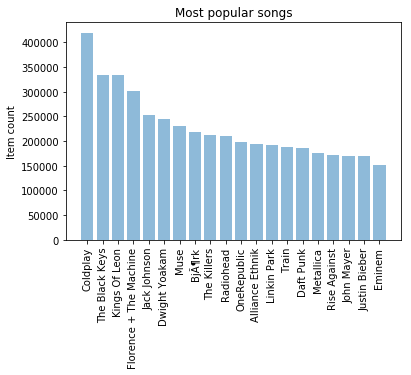

In [95]:
plt2.bar(y_pos, performance, align = 'center', alpha = 0.5)
plt2.xticks(y_pos, objects, rotation='vertical')
plt2.ylabel('Item count')
plt2.title('Most popular songs')
plt2.show()

### 最受欢迎的releases

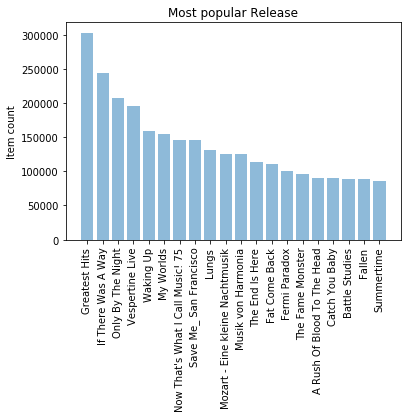

In [67]:
popular_release = triplet_dataset_sub_song_merged[['release','listen_count']].groupby('release').sum().reset_index()
popular_release_top_20 = popular_release.sort_values('listen_count', ascending=False).head(n=20)

objects = (list(popular_release_top_20['release']))
y_pos = np.arange(len(objects))
performance = list(popular_release_top_20['listen_count'])
 
plt2.bar(y_pos, performance, align='center', alpha=0.5)
plt2.xticks(y_pos, objects, rotation='vertical')
plt2.ylabel('Item count')
plt2.title('Most popular Release')
 
plt2.show()

## 最受欢迎的歌手

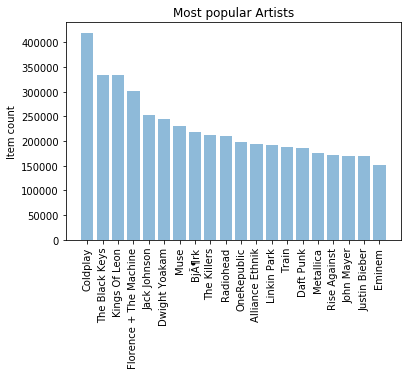

In [68]:
popular_artist = triplet_dataset_sub_song_merged[['artist_name','listen_count']].groupby('artist_name').sum().reset_index()
popular_artist_top_20 = popular_artist.sort_values('listen_count', ascending=False).head(n=20)

objects = (list(popular_artist_top_20['artist_name']))
y_pos = np.arange(len(objects))
performance = list(popular_artist_top_20['listen_count'])
 
plt2.bar(y_pos, performance, align='center', alpha=0.5)
plt2.xticks(y_pos, objects, rotation='vertical')
plt2.ylabel('Item count')
plt2.title('Most popular Artists')
 
plt2.show()

## 用户播放量的分布

In [73]:
user_song_count_distribution = triplet_dataset_sub_song_merged[['user','title']].groupby('user').count().reset_index().sort_values(by='title', ascending = False)

In [78]:
user_song_count_distribution.title.describe()

count    99996.000000
mean       107.749890
std         79.742561
min          1.000000
25%         53.000000
50%         89.000000
75%        141.000000
max       1189.000000
Name: title, dtype: float64

In [75]:
x = user_song_count_distribution.title

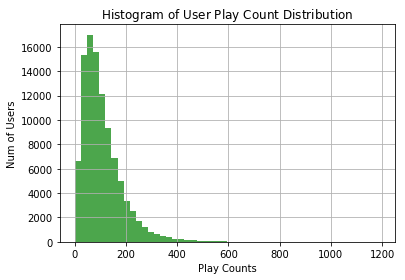

In [94]:
n, bins, patches = plt2.hist(x, 50, facecolor = 'green', alpha=0.7)
plt2.xlabel('Play Counts')
plt2.ylabel('Num of Users')
plt2.title(r'$\mathrm{Histogram\ of\ User\ Play\ Count\ Distribution}\ $')
plt2.grid(True)
plt2.show()

## 简单暴力，排行榜单推荐，越热门越推荐

In [98]:
import SampleCode.Recommenders as Recommenders
from sklearn.model_selection import train_test_split

In [99]:
triplet_dataset_sub_song_merged_set = triplet_dataset_sub_song_merged
train_data, test_data = train_test_split(triplet_dataset_sub_song_merged_set, test_size = 0.40, random_state=0)

In [100]:
train_data.head()

,user,song,listen_count,title,release,artist_name,year
1901799,28866ea8a809d5d46273cd0989c5515c660ef8c7,SOEYVHS12AB0181D31,1,Monster,The Fame Monster,Lady GaGa,2009
4815185,c9608a24a2a40e0ec38993a70532e7bb56eff22b,SOKIYKQ12A8AE464FC,2,Fight For Your Life,Made In NYC,The Casualties,2000
10513026,24f0b09c133a6a0fe42f097734215dceb468d449,SOETFVO12AB018DFF3,1,Free Style (feat. Kevo_ Mussilini & Lyrical 187),A Bad Azz Mix Tape,Z-RO,0
2659073,4da3c59a0af73245cea000fd5efa30384182bfcb,SOAXJOU12A6D4F6685,1,Littlest Things,Alright_ Still,Lily Allen,2006
5506263,b46c5ed385cad7ecea8af6214f440d19de6eb6c2,SOXBCAY12AB0189EE0,1,La trama y el desenlace,Amar la trama,Jorge Drexler,2010


In [101]:
train_data = triplet_dataset_sub_song_merged 
user_id = 'user'
item_id = 'title'
train_data_grouped = train_data.groupby([item_id]).agg({user_id:'count'}).reset_index()
train_data_grouped.rename(columns = {user_id: 'score'},inplace=True)
#排序
train_data_sort = train_data_grouped.sort_values(['score', item_id], ascending = [0,1])
#根据分值得到排名
train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method = 'first')

In [103]:
popularity_recommendations = train_data_sort.head(20)
popularity_recommendations

,title,score,Rank
19580,Sehr kosmisch,18626,1.0
5780,Dog Days Are Over (Radio Edit),17635,2.0
27314,You're The One,16085,3.0
19542,Secrets,15138,4.0
18636,Revelry,14945,5.0
25070,Undo,14687,6.0
7530,Fireflies,13085,7.0
9640,Hey_ Soul Sister,12993,8.0
25216,Use Somebody,12793,9.0
9921,Horn Concerto No. 4 in E flat K495: II. Romanc...,12346,10.0
